In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [34]:
df = pd.read_csv('/content/drive/Othercomputers/My Laptop/data-science-assignments/11 - Deep Learning/nba.csv', index_col='Name')
df.head()


,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
Name,,,,,,,,,,,,,,,,,,,,
Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [35]:
# Drop missings
df.dropna(inplace = True)
# Save X data
X = df.drop(columns = 'TARGET_5Yrs')
# Encode our target
y = df['TARGET_5Yrs']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [37]:
# Scale our data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
# Step 1: Define our network structure
# Save the number of features we have as our input shape
input_shape = X_train.shape[1]
input_shape

19

In [39]:
# Sequential model
model = Sequential()

In [40]:
# First hidden layer
model.add(Dense(19, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
# Second hidden layer
model.add(Dense(10, # How many neurons you have in your second hidden layer
                activation = 'relu')) # What activation function are you using?

In [41]:
# Output layer
model.add(Dense(1, activation = 'sigmoid'))
#model.add(Dense(1, activation = 'linear')) # This would be used for regression problem

In [42]:
# Step 2: Compile
model.compile(loss = 'bce', optimizer = 'adam')

In [43]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10)

Epoch 1/10
32/32 [==============================] - 1s 12ms/step - loss: 0.8819 - val_loss: 0.7400
Epoch 2/10
32/32 [==============================] - 0s 5ms/step - loss: 0.6837 - val_loss: 0.6289
Epoch 3/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6173 - val_loss: 0.5834
Epoch 4/10
32/32 [==============================] - 0s 4ms/step - loss: 0.5960 - val_loss: 0.5746
Epoch 5/10
32/32 [==============================] - 0s 5ms/step - loss: 0.5867 - val_loss: 0.5719
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: 0.5816 - val_loss: 0.5703
Epoch 7/10
32/32 [==============================] - 0s 4ms/step - loss: 0.5752 - val_loss: 0.5650
Epoch 8/10
32/32 [==============================] - 0s 6ms/step - loss: 0.5718 - val_loss: 0.5640
Epoch 9/10
32/32 [==============================] - 0s 5ms/step - loss: 0.5682 - val_loss: 0.5627
Epoch 10/10
32/32 [==============================] - 0s 5ms/step - loss: 0.5647 - val_loss: 0.5634


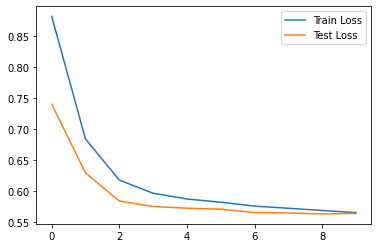

In [44]:
# Visualize the loss
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Test Loss')
plt.legend();